In [1]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
import xroms
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
ds_o = xr.open_dataset('/srv/data1/particleTrack_GLORYS/partTracking/ROMS_partTrack/prepareData/DATA_subDaily/ocean_his.nc')
ds = xr.open_dataset('/srv/data1/particleTrack_GLORYS/partTracking/ROMS_partTrack/prepareData/DATA/ocean_his_2018-03-12_added.nc')
#ds_o = ds_o.sel(ocean_time=slice('2018-05-21 06:00:00', '2018-05-21 06:00:00')) #ocean_time=datetime(2018,3,25))
# ds_o, xgrid = xroms.roms_dataset(ds_o)
# ds_o.xroms.set_grid(xgrid)
#ds.close()
# ds_o.close()

In [15]:
ds_o

<xarray.Dataset>
Dimensions:         (tracer: 2, boundary: 4, s_rho: 30, s_w: 31, Nuser: 25,
                     eta_rho: 599, xi_rho: 2599, eta_u: 599, xi_u: 2598,
                     eta_v: 598, xi_v: 2599, eta_psi: 598, xi_psi: 2598,
                     ocean_time: 186)
Coordinates:
  * s_rho           (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w             (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
    lon_rho         (eta_rho, xi_rho) float64 ...
    lat_rho         (eta_rho, xi_rho) float64 ...
    lon_u           (eta_u, xi_u) float64 ...
    lat_u           (eta_u, xi_u) float64 ...
    lon_v           (eta_v, xi_v) float64 ...
    lat_v           (eta_v, xi_v) float64 ...
    lon_psi         (eta_psi, xi_psi) float64 ...
    lat_psi         (eta_psi, xi_psi) float64 ...
  * ocean_time      (ocean_time) datetime64[ns] 2018-05-21 ... 2018-06-13T03:...
Dimensions without coordinates: tracer, boundary, Nuser, eta_rho, xi_rho,
                                eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/113)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    EminusP         (ocean_time, eta_rho, xi_rho) float32 ...
    swrad           (ocean_time, eta_rho, xi_rho) float32 ...
    sustr           (ocean_time, eta_u, xi_u) float32 ...
    svstr           (ocean_time, eta_v, xi_v) float32 ...
    bustr           (ocean_time, eta_u, xi_u) float32 ...
    bvstr           (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/38)
    file:              ocean_his.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             PCF
    var_info:          ./varinfo.dat
    ...                ...
    compiler_command:  /vortexfs1/apps/intel/compilers_and_libraries_2018.2.1...
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            012x012
    history:           ROMS/TOMS, Version 3.9, Wednesday - May 29, 2024 -  9:...
    ana_file:          /proj/seolab/srai/WPE/Build/ana_btflux.h
    CPP_options:       PCF, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, AVERAGES, ...

In [42]:
ds

<xarray.Dataset>
Dimensions:    (ocean_time: 1, s_rho: 30, lat_rho: 599, lon_rho: 2599)
Dimensions without coordinates: ocean_time, s_rho, lat_rho, lon_rho
Data variables: (12/21)
    f          (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    rho        (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    pres       (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    wo         (ocean_time, s_rho, lat_rho, lon_rho) float32 ...
    dx_pres    (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dy_pres    (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    ...         ...
    dx_vo      (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dy_vo      (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dz_vo      (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dx_wo      (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dy_wo      (ocean_time, s_rho, lat_rho, lon_rho) float64 ...
    dz_wo      (ocean_time, s_rho, lat_rho, lon_rho) float64 ...

In [20]:
ssh = ds_o['zeta']
lat = ds_o['lat_rho']
lon = ds_o['lon_rho']
s_rho = ds_o['s_rho']
s_w = ds_o['s_w']
z_rho = ds_o['z_rho']
z_w = ds_o['z_w']
zeta = ds_o['zeta']
h = ds_o['h']
mask = ds_o['mask_rho']
vstretch = ds_o['Vstretching']
vtransf = ds_o['Vtransform']

In [21]:
vstretch.to_numpy(), vtransf.to_numpy(), 

(array(4, dtype=int32), array(2, dtype=int32))

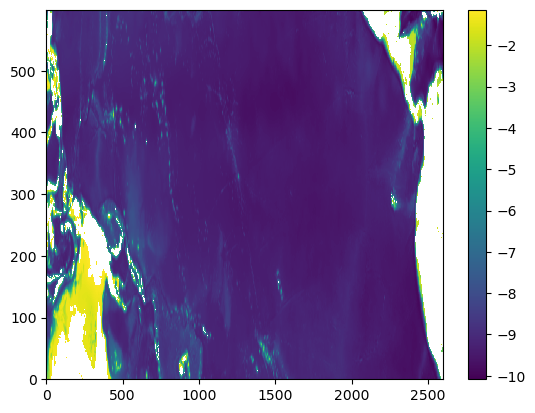

In [22]:
plt.pcolormesh(z_w[0,-2,:,:])
plt.colorbar()

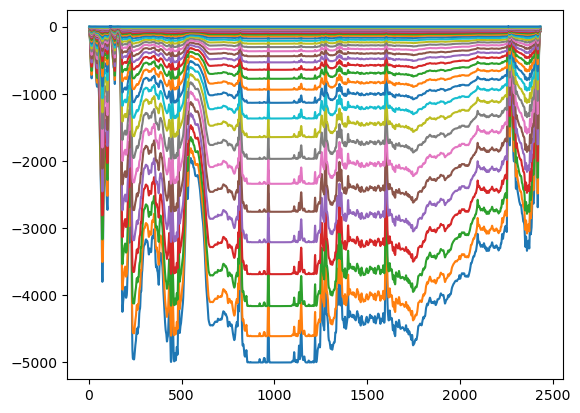

In [23]:
plt.plot(z_w[0,:,300,:].T)

In [46]:
arr = ds['temp']#.sel(ocean_time=slice('2018-03-25', '2018-03-25')) #ocean_time=datetime(2018,3,25))
arr.shape

KeyError: 'temp'

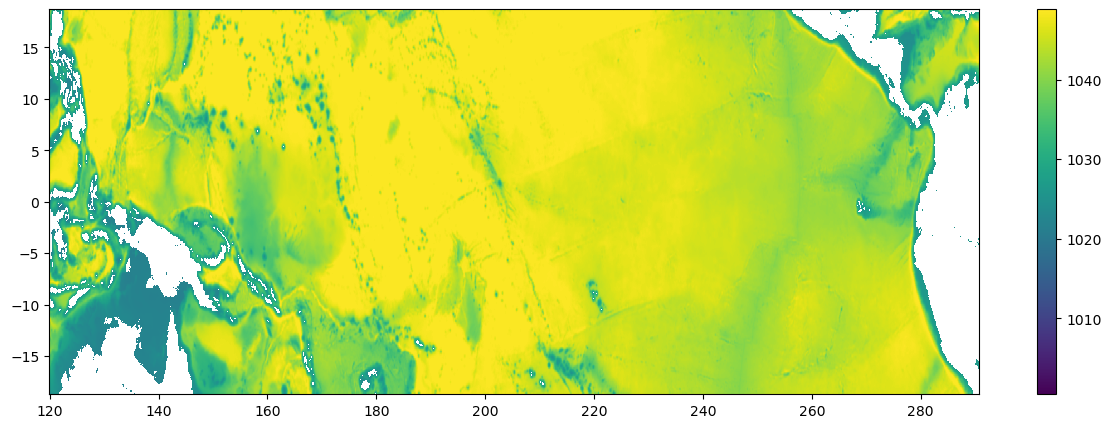

In [45]:
plt.figure(figsize=(15,5))
plt.pcolormesh(lon, lat, arr[0,0,:,:])#, vmin=-0.5, vmax = 0.8)
plt.colorbar()

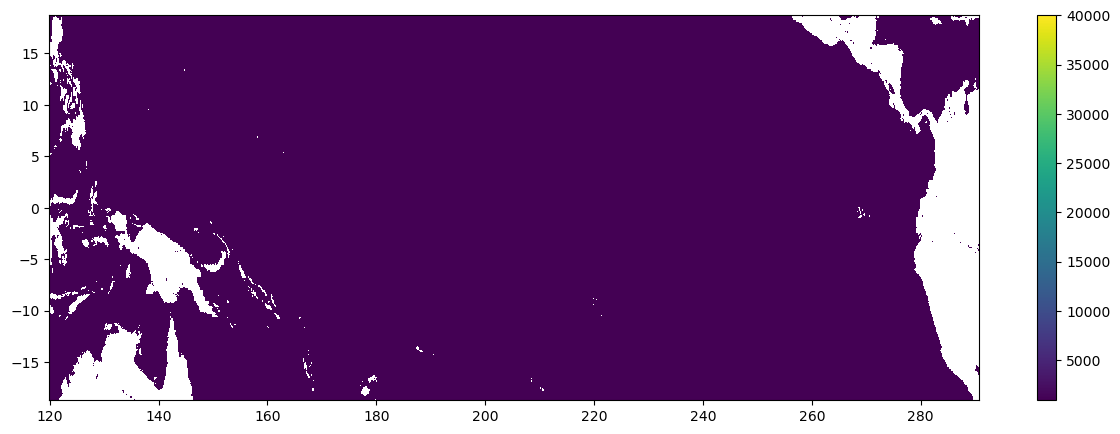

In [41]:
plt.figure(figsize=(15,5))
plt.pcolormesh(lon, lat, arr[0,-1,:,:], vmin=40000)#, vmax = 0.8)
plt.colorbar()

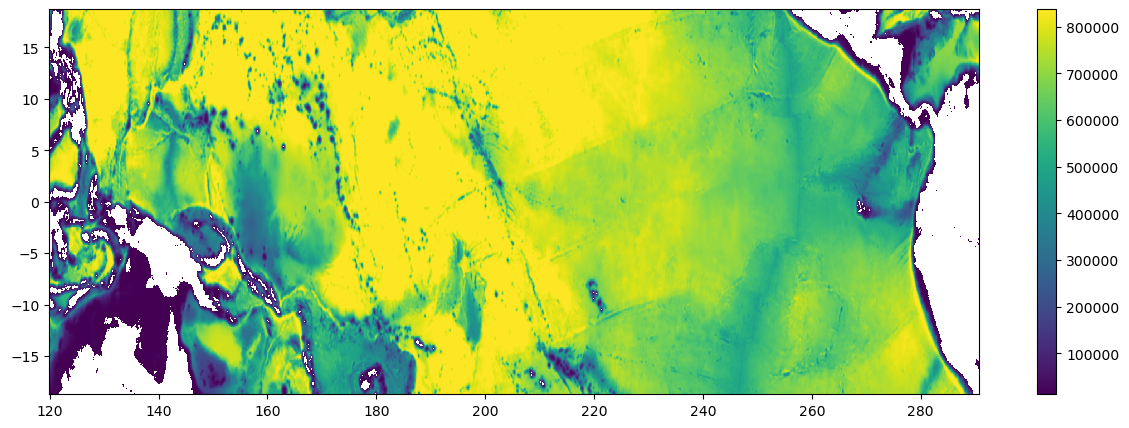

In [14]:
plt.figure(figsize=(15,5))
plt.pcolormesh(lon, lat, arr[0,-1,:,:])#, vmin=-0.5, vmax = 0.8)
plt.colorbar()

In [ ]:
plt.figure(figsize=(15,5))
plt.pcolormesh(lon, lat, arr[0,0,:,:])#, vmin=-0.5, vmax = 0.8)
plt.colorbar()

In [ ]:
s_w = ds['s_w'].to_numpy()

In [ ]:
plt.plot(s_w)

In [ ]:
s_w[-1]

In [ ]:
plt.figure(figsize=(15,5))
plt.pcolormesh(lon, lat, ssh[0,:,:], vmin=-0.5, vmax = 0.8)
plt.colorbar()
x = np.array([360-103.5,360-101])
y = np.array([12,13.5])
plt.scatter(x,y,s= 0.5, color = 'r')


In [ ]:
plt.figure(figsize=(15,5))
plt.pcolormesh(lon, lat, u[0,-1,:,:])#, vmin=-0.5, vmax = 0.8)
plt.colorbar()
x = np.array([360-103.5,360-101])
y = np.array([12,13.5])
plt.scatter(x,y,s= 0.5, color = 'r')

In [ ]:
xx = np.array(len(lat)* [lon])
yy = np.array(len(lon)* [lat]).T  
mask1 = np.logical_and(xx > -103.5, xx < -101)
mask2 = np.logical_and(yy > 12, yy < 14)
mask = np.logical_and(mask1, mask2)

In [ ]:
plt.figure(figsize=(15,5))
plt.pcolormesh(lon, lat, ssh[0,:,:], vmin=0, vmax = 0.6)
plt.scatter(x,y,s= 0.1, color = 'r')
#plt.pcolormesh(lon, lat, mask, vmin=0, vmax = 0.6, alpha=0.2)
plt.colorbar()

In [ ]:
lons = xx[mask]
lats = yy[mask]

In [ ]:
x = np.random.choice(lons, size=100)
y = np.random.choice(lats, size=100)

In [ ]:
y